# **Predicting Obesity/BMI (UCI Machine Learning Repository)**

### **Introduction to the Problem and the Dataset**

**Problem:**

Obesity is a critical public health issue linked to various chronic diseases such as diabetes, cardiovascular conditions, and certain types of cancer. Understanding the factors contributing to obesity is essential to effectively prevent and address it. For my final project, I aim to develop a **predictive model to estimate Body Mass Index (BMI)**, a measure of obesity, based on **lifestyle and physical condition data**.

BMI is calculated using height and weight and serves as a continuous variable that reflects an individual’s weight status. By **analyzing the impact of various behaviors and conditions**—such as dietary habits, physical activity, and smoking—on BMI, this project could help healthcare professionals and policymakers design better-targeted public health campaigns and personalized health recommendations. Successfully building this model will not only enhance our ability to predict BMI but also deepen our **understanding of the complex relationship between lifestyle choices and obesity**.

**Dataset Description:**

The dataset, Estimation of Obesity Levels Based on Eating Habits and Physical Condition, contains **2111 records with 17 features**. It is in CSV format, and it includes numerical variables like Age, Height, Weight, and physical activity metrics, as well as categorical variables such as gender, smoking status, and dietary habits.

The target variable, BMI, can be calculated from Height and Weight. The dataset requires preprocessing, including encoding categorical variables and scaling numerical features, to build effective predictive models.

**Note on BMI:**

BMI is not always an accurate indicator of obesity on an** individual level**. For example, people with a **lot of muscle** might have a BMI that puts them in the overweight/obese range, but they are actually fit in reality. However, BMI is an **easy metric** to use, and on a **population level**, it can reasonably detect obesity relatively accurately. **Obesity is identified by a BMI of 30 or greater**.

# **Importing Data**

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import zipfile
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

**Importing Data**

Importing from UCI's Machine Learning Depository

In [11]:
!pip3 install -U ucimlrepo

In [52]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

Putting data extracted from UCI into a dataframe so that it can be processed.

Adding BMI as a column, **feature engineering**

In [53]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Display the first few rows to verify
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [54]:
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')


In [55]:
#making sure that there is no null data
print(f"Number of null values in each column:\n{df.isnull().sum()}")

Number of null values in each column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


# **Exploratory Data Analysis (EDA)**

**Visualizing frequency distribution for numerical independent variables using histogram.**

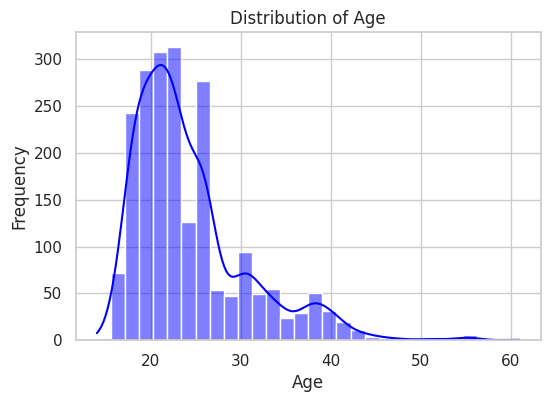

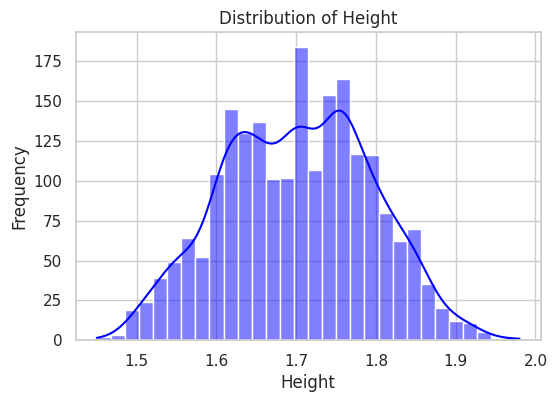

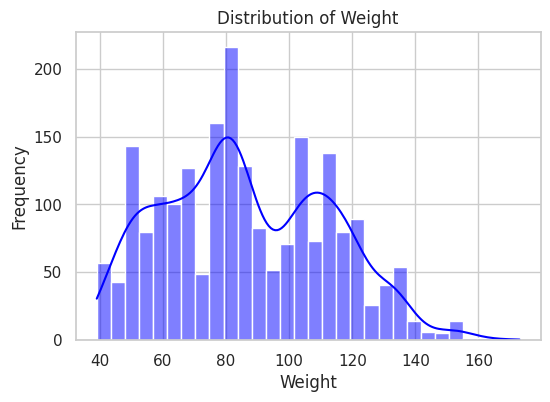

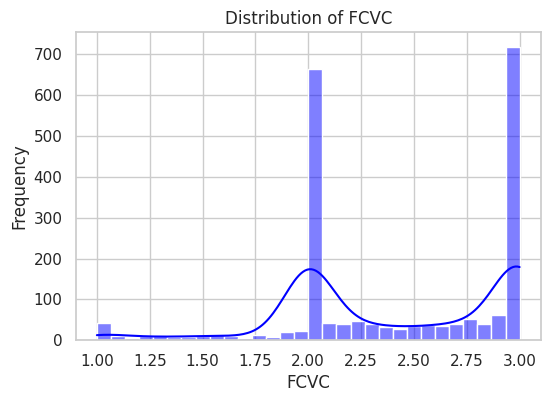

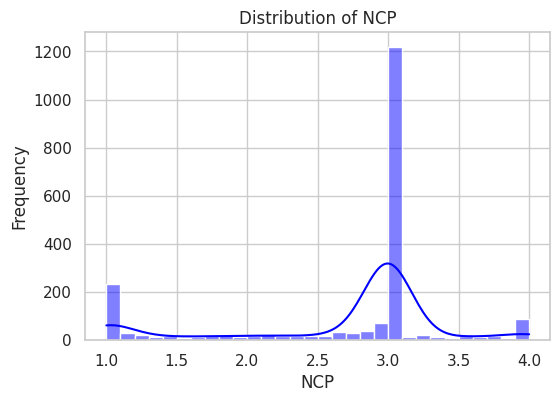

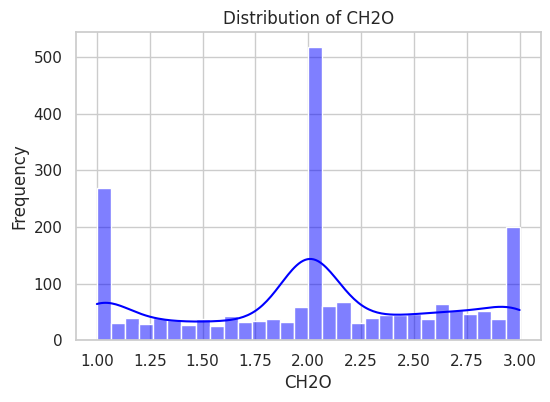

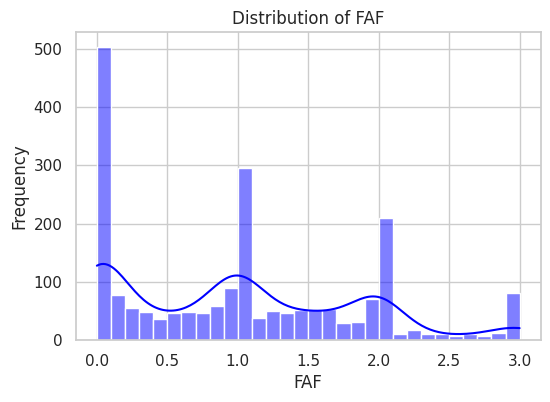

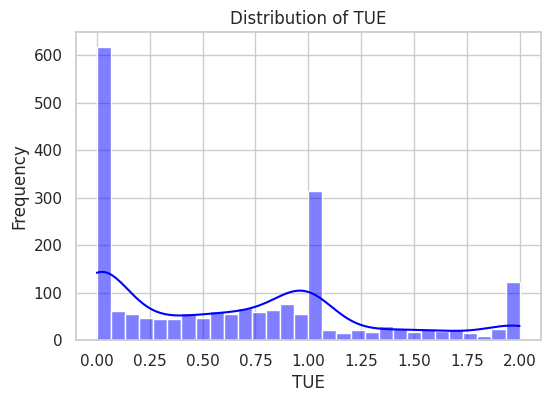

In [48]:
sns.set(style="whitegrid")

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In terms of the data we have available, we have more data from younger people between the age of 20-30. Height distribution is fairly normal with a mean of ~1.7m. Weight distribution kind of resembles a normal distribution. For consumption of vegetables (FCVC) and number of meals people have daily (NCP), etc, their modes are pretty clear, which makes sense since people prefer whole numbers and their frequency also just makes sense as it is what we usually observe in real life.

**Visualizing count distribution for categorical independent variables using pie chart.**

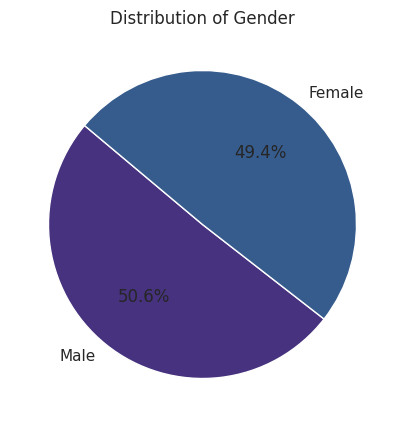

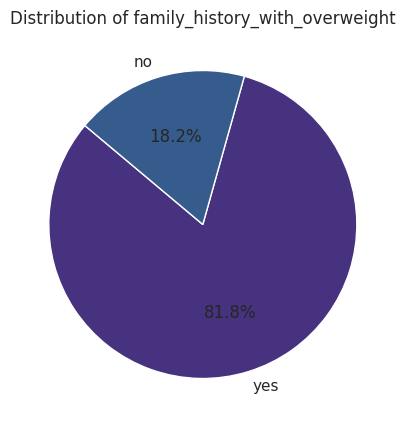

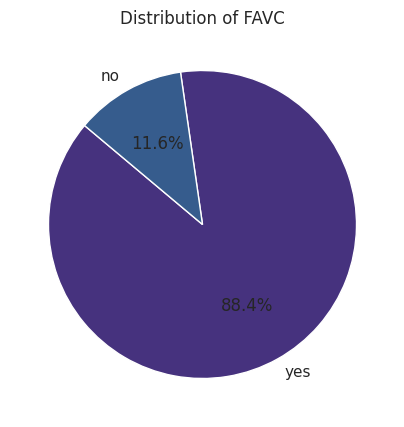

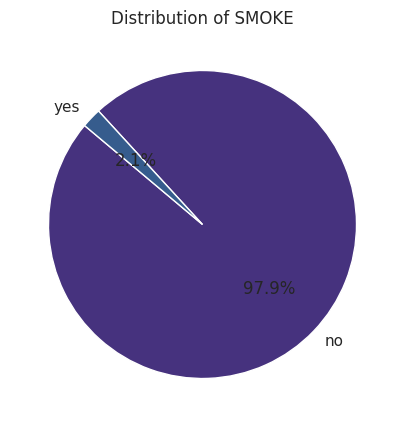

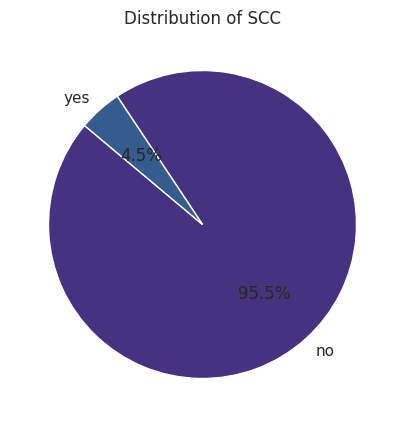

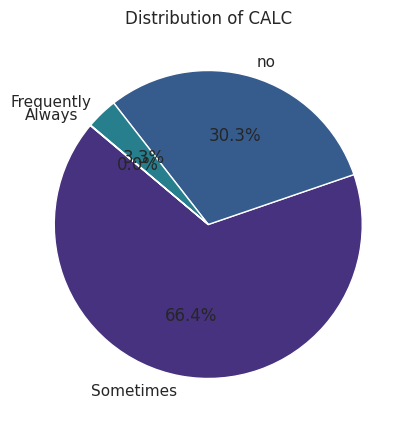

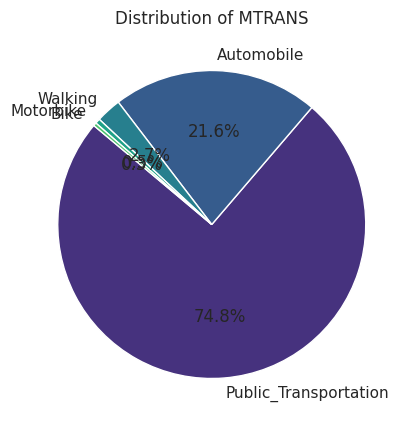

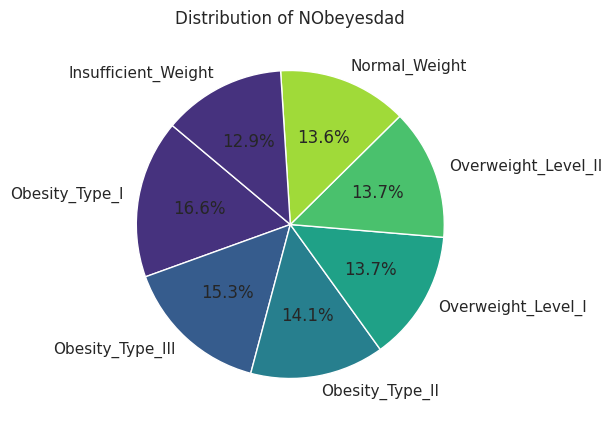

In [49]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC',
                       'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in categorical_columns:
    plt.figure(figsize=(5, 5))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
    plt.title(f"Distribution of {column}")
    plt.ylabel('')  # Removes y-axis label for better aesthetics
    plt.show()

Here, it is obvious that we don't always have a good split of people it represent. For example, although there is a very even split in terms of gender, we have a lot of non-smokers, lot of people who use either mostly use automobile or public transportation, etc. This is not ideal for data analysis since the absence of data on certain groups is not representative of the analysis we conduct.

**Visualizing the dependent variable, BMI, using a boxplot and a histogram.**

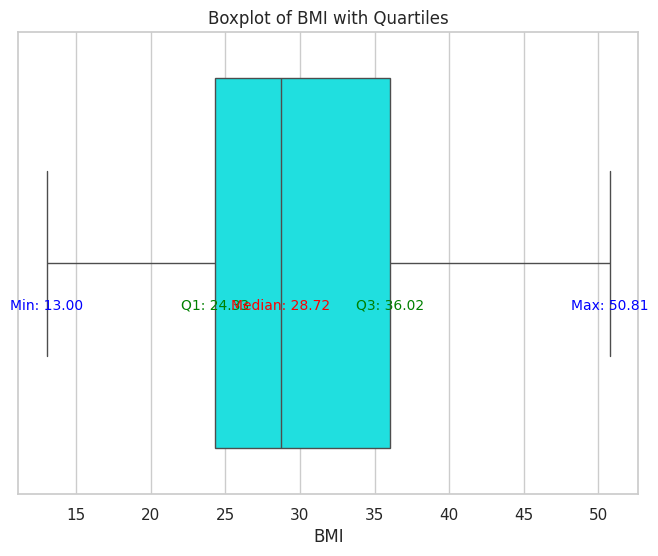

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'], color="cyan")

# Calculate statistics
q1 = df['BMI'].quantile(0.25)
median = df['BMI'].median()
q3 = df['BMI'].quantile(0.75)
min_bmi = df['BMI'].min()
max_bmi = df['BMI'].max()

# Annotate statistics on the plot
plt.text(min_bmi, 0.1, f"Min: {min_bmi:.2f}", ha='center', color='blue', fontsize=10)
plt.text(q1, 0.1, f"Q1: {q1:.2f}", ha='center', color='green', fontsize=10)
plt.text(median, 0.1, f"Median: {median:.2f}", ha='center', color='red', fontsize=10)
plt.text(q3, 0.1, f"Q3: {q3:.2f}", ha='center', color='green', fontsize=10)
plt.text(max_bmi, 0.1, f"Max: {max_bmi:.2f}", ha='center', color='blue', fontsize=10)

plt.title("Boxplot of BMI with Quartiles")
plt.xlabel("BMI")
plt.show()

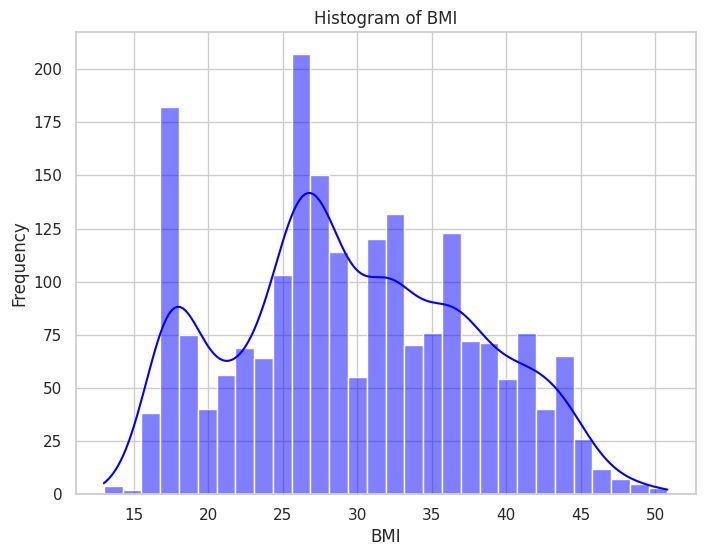

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=30, color="blue")
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

The distribution of BMI in the dataset exhibits a slightly right-skewed shape, as evident in both the histogram and boxplot. The median BMI lies slightly below the center of the interquartile range (IQR), indicating that a majority of the data clusters around a central value but with a tail extending toward higher BMI values. The first quartile (Q1) and third quartile (Q3) suggest that 50% of the BMI values fall within a narrow range, reflecting a relatively consistent distribution among most participants. Note, BMI of 30 and above are considered obsese.

However, the presence of outliers beyond the upper whisker in the boxplot suggests that there are individuals with significantly higher BMI values, potentially indicating cases of severe obesity. The KDE curve overlaid on the histogram reveals a single prominent peak, further supporting the concentration of BMI values around the mean. These insights highlight the diversity in BMI across the dataset, with a small subset of extreme values that warrant closer examination in subsequent analyses.

Data looks normal for now.

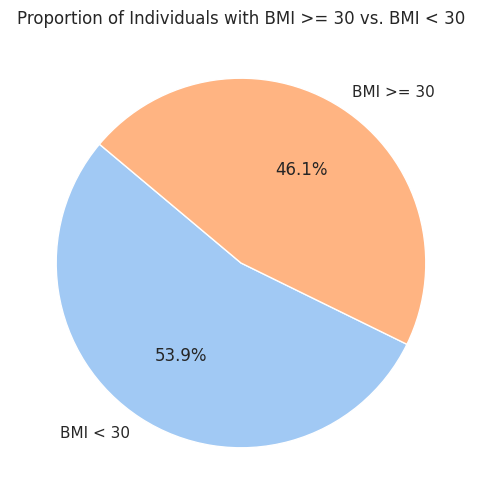

In [61]:
bmi_split = df['BMI'] >= 30
bmi_categories = bmi_split.map({True: 'BMI >= 30', False: 'BMI < 30'})

bmi_counts = bmi_categories.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
bmi_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Individuals with BMI >= 30 vs. BMI < 30")
plt.ylabel('')
plt.show()

Additionally, I have created a graph identifying the % of obese people in our dataset. As could be seen, almost half, 46.1% of the people in our data set are obese! This is terrible news. Hopefully this is not representative of the overall population. On the other hand, it is good news as it provides a relatively even split of obese & non-obese people for us to work with.

**Since there are many variables, let's see which one's are important to analyze with BMI in terms of continuous variables.**

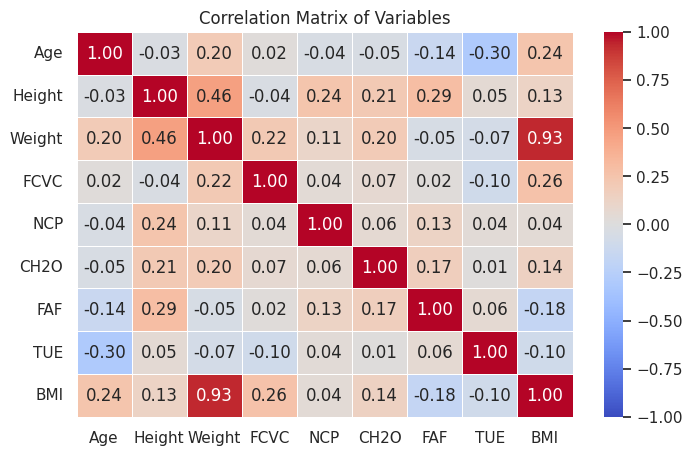

In [59]:
correlation_matrix = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

With BMI, we can see **weight** has the strongest correlation, which is understandable. It means that weight changes around much more than height, resulting in its positive correlation with BMI. This is supported by height's relatively low correlation with BMI.

Second in place is **how often people eat vegetable**.

**Age** supprisingly also has a relatively strong correlation with BMI. This could be that as we age, our metablolism slows down and we gain weight/BMI as a result.

**How often people exercise** also has a strong correlation, and this is understandable because more active people tend to burn more calories and reduce their BMI.

What surprises me is the positive correlation of how much **water** people drink and the negative correlation of how often people **use devices**. A likely explanation for the positive correlation between water consumption and BMI could be that people also consider drinking sugary drinks as water. And digital devices could be for work purposes and people with higher income and could afford a healthier life style use more technology in their life. Vegetale consumption as well, which I will talk about later.

Let's take a closer look at the correlation between some of the variables and BMI.

**Closer look at variables and correlation with BMI.**

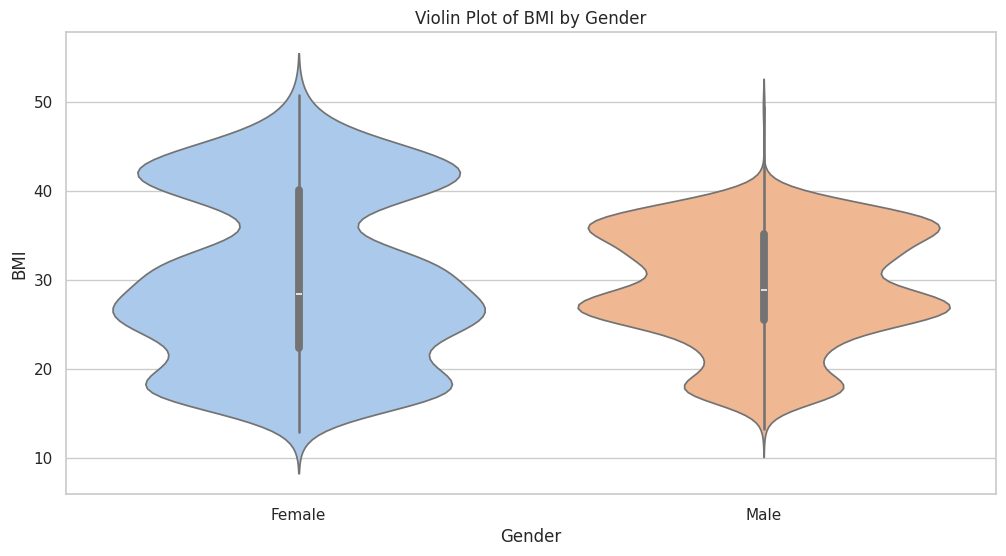

In [68]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='BMI', data=df, palette="pastel")
plt.title("Violin Plot of BMI by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

For males, the BMI distribution shows a broader spread with a higher density around the overweight and obesity range, indicating a higher median BMI.

For females, the distribution appears narrower, with a greater concentration around the lower BMI range, suggesting a slightly healthier average BMI compared to males.

However, the median is around the same, meaning that **gender is not a major contributing factor** to likelihood of obesity, but variability.

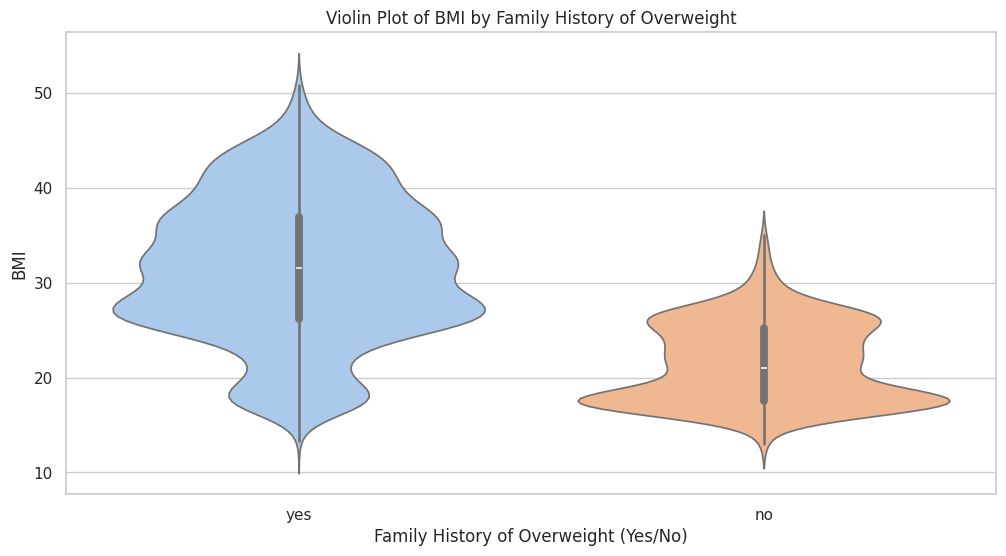

In [69]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='family_history_with_overweight', y='BMI', data=df, palette="pastel")
plt.title("Violin Plot of BMI by Family History of Overweight")
plt.xlabel("Family History of Overweight (Yes/No)")
plt.ylabel("BMI")
plt.show()

There is actually a significant correlation between whether your family has a history of being overweight and the likelihood of you being overweight. It could be seen that BMI of people with a family history is much higher and much more skewed towards the higher BMI spectrum.

This highlights the **potential genetic or familial influence on BMI**, as individuals with a family history of being overweight are more likely to have higher BMI values.

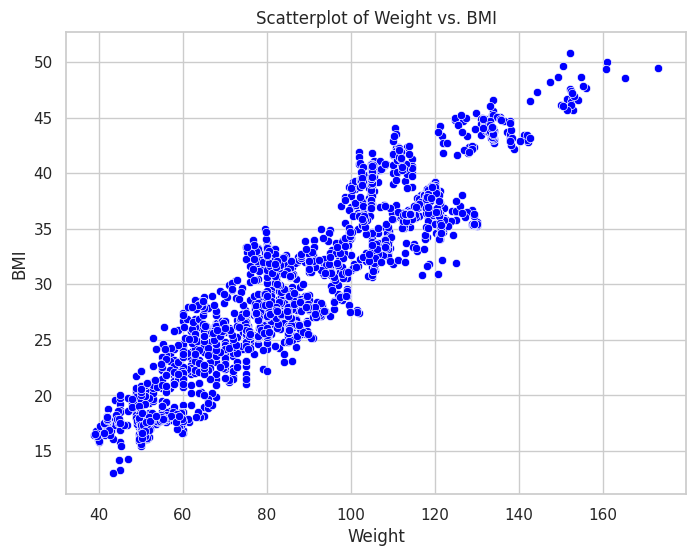

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='BMI', data=df, color="blue")
plt.title("Scatterplot of Weight vs. BMI")
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

As expected, the relationship between weight and BMI is very linear with few outliers. As a result, we should look more into what variables contribute to high weight/BMI.

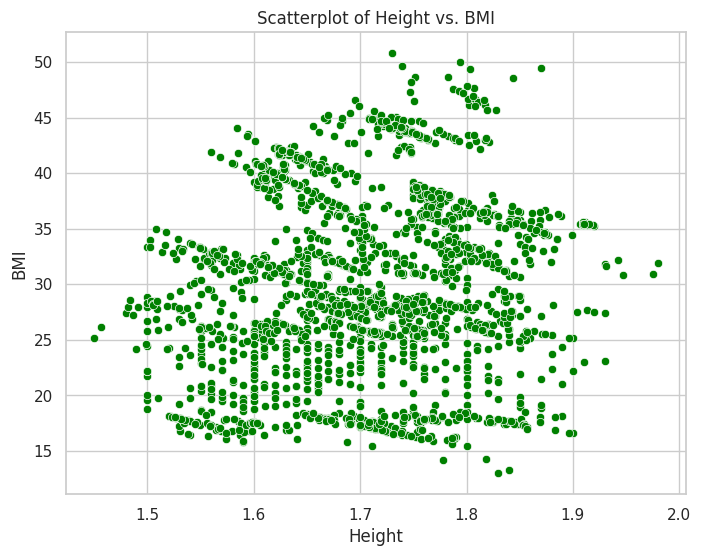

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='BMI', data=df, color="green")
plt.title("Scatterplot of Height vs. BMI")
plt.xlabel("Height")
plt.ylabel("BMI")
plt.show()

The scatterplot indicates a negative correlation between height and BMI, Individuals with greater height tend to have lower BMI for the same weight range. However, the correlation is not so clear compared by weight, and since it is not a major contributing factor to weight/BMI, we could largely ignore it in our data set.

Finding the range for daily vegetable consumption frequency.

In [63]:
fcvc_min = df['FCVC'].min()
fcvc_max = df['FCVC'].max()

fcvc_range = (fcvc_min, fcvc_max)
fcvc_range

(1.0, 3.0)

Note, this is the frequency of vegetable consumption but not quantity, but we assume that the correlation between the 2 is positive.

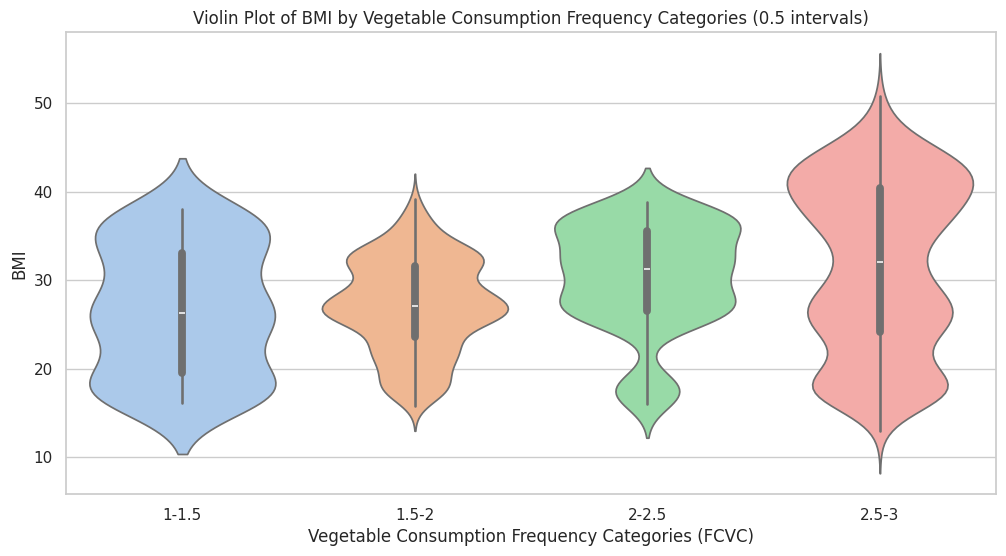

In [66]:
bins = [1, 1.5, 2, 2.5, 3]
labels = ['1-1.5', '1.5-2', '2-2.5', '2.5-3']
df['FCVC_Category'] = pd.cut(df['FCVC'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='FCVC_Category', y='BMI', data=df, palette="pastel")
plt.title("Violin Plot of BMI by Vegetable Consumption Frequency Categories (0.5 intervals)")
plt.xlabel("Vegetable Consumption Frequency Categories (FCVC)")
plt.ylabel("BMI")
plt.show()

From this graph, we can observe that there is a **positive correlation between vegetable consumption and BMI**, which is surprising. I assume because vegetables are high fibre and low in calorie content, they are more satiating and could help reduce overall calorie consumption and lower BMI.

I guess that frequency of vegetable consumption does not correlate significantly with the quantity or its caloric content (how it's made). For example, individuals with higher BMI might consciously increase their vegetable intake as part of dietary efforts to manage weight. Additionally, high FCVC could coincide with other behaviors, such as consuming calorie-dense foods or larger portions, that offset the potential benefits of vegetable consumption.

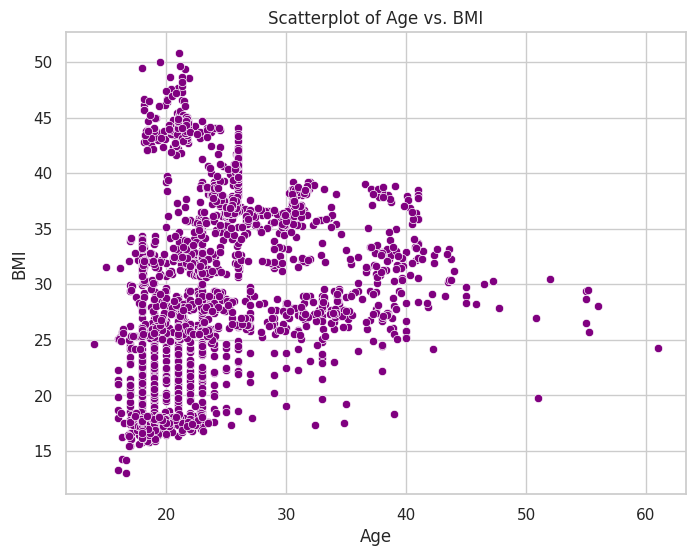

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=df, color="purple")
plt.title("Scatterplot of Age vs. BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

There is a slight positive correlation between Age and BMI, which could reflect age-related trends in weight gain. As people age, **metabolic rates typically slow down**, and **physical activity levels may decrease**, making it easier to gain weight and harder to maintain a lower BMI. Additionally, dietary habits and lifestyle factors can shift with age, potentially leading to higher BMI values over time. However, the scatterplot indicates significant variability, suggesting other factors also strongly influence BMI regardless of age.

***There are simply way too many independent variables for me to go through them one by one, so I won't do the same kind of analysis for all of them.***

# **Linear Regression Modeling & Intepretation**

I am going to use linear regression to see what independent variables contribute most significantly to BMI, our dependent variable.

To do this, I am using 80% of the data for training and 20% for testing.

In terms of the target variables I want to use, I want to use ones that have **moderate to high correlation with BMi**, but those with the **least amount of multicollinearity**.

I am thinking about using age, FCVC (Vegetable Consumption), NCP (number of meals, family history with overweight, CALC (alcohol consumption), gender, physical activity, and water intake.

I will not include weight and height since these two will have super high multicollinearity with BMI which will result in overfitting and inaccuracy of our model. On top of that, height is smoething that we cannot really control, so it is not useful even if I identify a correlation and there is no multi-collinearity.

**Evaluation Metrics:**

**R² and MSE are the most useful metrics** for evaluating this BMI prediction model. R² measures how much of the **variability** in BMI is explained by the model, providing a clear sense of its overall effectiveness.

MSE quantifies the **average squared difference between predicted and actual BMI values**, offering insight into the model's accuracy.

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

predictor_columns = ['Age', 'FCVC', 'NCP', 'FAF', 'CH2O', 'TUE',
                     'family_history_with_overweight', 'CALC', 'Gender', 'SMOKE']
target_column = 'BMI'

# Split the data into predictors (X) and target (y)
X = df[predictor_columns]
y = df[target_column]

# Define column groups for preprocessing
numerical_columns = ['Age', 'FCVC', 'NCP', 'FAF', 'CH2O', 'TUE']
categorical_columns = ['family_history_with_overweight', 'CALC', 'Gender', 'SMOKE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Create the pipeline with preprocessing and regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



**Training the model:**

In [81]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'FAF',
                                                   'CH2O', 'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['family_history_with_overweight',
                                                   'CALC', 'Gender',
                                                   'SMOKE'])])),
                ('regressor', LinearRegression())])

Evaluating the model.

In [82]:
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(0.36662174328254726, 41.83853303828235)

The model achieves an **R² of 0.3666**, indicating that approximately 36.66% of the variance in BMI is explained by the selected predictors, while the remaining 63.34% is due to unmeasured factors or noise.

The **MSE of 41.84** corresponds to an average prediction error of about 6.47 BMI units, suggesting that the model captures some relationships but struggles with accuracy. This modest performance may stem from **missing predictors, non-linear relationships, or variability in the data**.

Baseline model?

In [86]:
baseline_prediction = y_train.mean()

baseline_predictions = [baseline_prediction] * len(y_test)

baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

baseline_mse, baseline_r2

(66.05777739499631, -2.454318341027495e-05)

**Our model outperformed the baseline model in both MSE and R²**. This shows that the predictors used in our model add meaningful value in explaining variations in BMI.

Which features are most important in our model?

In [88]:
from sklearn.inspection import permutation_importance

# Perform permutation importance again to redefine results
permutation_results = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature names from the preprocessing pipeline
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Ensure feature names match the length of the importance array
if len(feature_names) == len(permutation_results.importances_mean):
    # Create DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': permutation_results.importances_mean
    })
else:
    # Handle mismatched lengths (truncate to align)
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:len(permutation_results.importances_mean)],
        'Importance': permutation_results.importances_mean
    })

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
feature_importance_df.reset_index(drop=True)

,Feature,Importance
0,cat__family_history_with_overweight_yes,0.397087
1,num__FCVC,0.081144
2,cat__CALC_Frequently,0.073852
3,num__Age,0.041738
4,num__FAF,0.023012
5,num__CH2O,0.016007
6,num__TUE,0.000500
7,cat__CALC_no,0.000433
8,num__NCP,0.000024
9,cat__CALC_Sometimes,-0.000366


### **Initial Result & Analysis**


The **top 3 features** for predicting BMI are likely **Physical Activity Frequency (FAF)**, **Age**, and **Family History with Overweight**. It makes sense that physical activity ranks high—it’s one of the most direct ways people manage their weight. Age is another strong predictor because as we get older, metabolism slows down, and it’s easier to gain weight. Family history also plays a big role since genetics can influence how our bodies store fat and process energy. These features are closely tied to BMI, so their importance isn’t surprising.

On the flip side, the **bottom 3 features** are likely **Water Intake (CH2O)**, **Smoking Habit (SMOKE)**, and **Time Using Technology (TUE)**. Water intake is important for health but doesn’t have a strong direct link to BMI compared to things like exercise or diet. Smoking might affect appetite or metabolism, but in this dataset, it doesn’t seem to make a big difference for BMI. Time spent on technology also has an indirect relationship with BMI—while it might reflect a sedentary lifestyle, it doesn’t seem as strong as physical activity or eating habits.

The difference between the top and bottom features comes down to **how directly they affect net calorie intake**. Physical activity, age, and family history are strongly tied to weight, while water intake, smoking, and tech time are **more secondary or indirect factors**.

To refine my model, I am deciding between using Random Forest or KNN.

**Random Forest is better** than KNN for this model because it handles non-linear relationships, identifies important features, and is faster for predictions. It’s more robust with mixed data types and requires less preprocessing, making it a practical choice for predicting BMI.

## **Random Forest Model**

Preparing and training the random forest model.

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the Random Forest model using the pipeline (preprocessing + regression)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

In [91]:
# Fit the model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'FAF',
                                                   'CH2O', 'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['family_history_with_overweight',
                                                   'CALC', 'Gender',
                                                   'SMOKE'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Seeing the result

In [92]:
y_pred_rf = pipeline_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf, mse_rf

(0.8507342963614409, 9.859918629872082)

### **Secondary Model (Random Forest) Result & Analysis** **bold text**

The **Random Forest model significantly outperforms both the baseline and the original linear regression model**. With an **R² of 0.8507**, it explains over 85% of the variance in BMI, compared to 36.66% for the linear regression model and near 0% for the baseline. Its **MSE of 9.86** also represents a major improvement, reducing prediction error by over 75% compared to the linear regression model (MSE = 41.84) and over 85% compared to the baseline (MSE = 66.06).

This shows how Random Forest can capture **complex, non-linear relationships** in the data, making it the most effective model so far.

## **Ridge Regression**


I should try **Ridge regression** because some factors in the dataset likely **influence each other**, leading to **multicollinearity**, which can make linear regression less reliable.

For example, people with higher physical activity levels might have other lifestyle habits that affect BMI. This overlap can **inflate the coefficients** in standard linear regression, making it harder to interpret and less accurate. Ridge regression addresses this by **penalizing large coefficients**, helping to reduce the impact of multicollinearity and creating a more stable and generalizable model.


In [101]:
from sklearn.linear_model import Ridge

# Define predictors and target variable
predictor_columns = ['Age', 'FCVC', 'NCP', 'FAF', 'CH2O', 'TUE',
                     'family_history_with_overweight', 'CALC', 'Gender', 'SMOKE']
target_column = 'BMI'

X = df[predictor_columns]
y = df[target_column]

In [102]:
# Define column groups for preprocessing
numerical_columns = ['Age', 'FCVC', 'NCP', 'FAF', 'CH2O', 'TUE']
categorical_columns = ['family_history_with_overweight', 'CALC', 'Gender', 'SMOKE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data using encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

In [103]:
# Create a pipeline with Ridge regression
ridge = Ridge(random_state=42)
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge)
])

Ridge Regression Results:
{'Best Alpha': 0.1, 'R²': 0.366642142711434, 'MSE': 41.83718553042209}


In [104]:
# Finding the best Alpha
param_grid = {'regressor__alpha': [0.1, 1, 10, 100, 1000]}

ridge_cv = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'FAF',
                                                                          'CH2O',
                                                                          'TUE']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['family_history_with_overweight',
                                                                          'CALC',
                                                                          'Gender',
                                                                          'SMOKE'])])),
                                       ('regressor', Ridge(random_state=42))]),
             param_grid={'regressor__alpha': [0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [105]:
# Predicting and evaluating
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

ridge_results = {
    "Best Alpha": ridge_cv.best_params_['regressor__alpha'],
    "R²": r2_ridge,
    "MSE": mse_ridge
}

print("Ridge Regression Results:")
print(ridge_results)

Ridge Regression Results:
{'Best Alpha': 0.1, 'R²': 0.366642142711434, 'MSE': 41.83718553042209}


### **Ridge Regression Summary**

Ridge regression performed **better than the base line and my original linear regression model** since it captured the relationship **between predictors**, reducing multicollinearity by penalizing large coefficients.

However, this is not as good as the random forest model since I have a lot of **non-linear relationships** here with all the **categorical features** going on. If the dataset had more continuous data then ridge regression could have been better.

# **Summary & Next Steps**

In my analysis of BMI prediction, all the models I constructed outperformed the baseline predictor, highlighting their effectiveness and relevance. The models ranked in terms of performance are as follows: Random Forest Regression, Ridge Regression, and Multiple Linear Regression.

### Key Findings:

1) **Success of Random Forest Model**: The Random Forest model demonstrated the best predictive performance, significantly outperforming other models. Its ability to capture non-linear relationships and feature interactions made it the most effective for BMI prediction.

2) **Impactful Features**: Physical activity frequency (FAF), age, and family history with overweight consistently emerged as the most influential factors in predicting BMI, showcasing their strong relationship with weight and health behaviors.

3) **Variable Influence**: Features like water intake, smoking habits, and time using technology had comparatively lower impacts but still contributed minor insights, depending on the model.

In conclusion, the Random Forest model, with its ensemble approach and ability to handle complex patterns, proved to be the most effective. The importance of physical activity, age, and family history aligns with known health factors influencing BMI. These findings provide actionable insights for future predictive modeling and BMI-related research.

### Next Steps/Improvements

To enhance the predictive capabilities of the BMI models and gain deeper insights into the factors influencing BMI, I propose the following improvements:

1) **Dietary Diversity and Nutritional Intake**:  
   Incorporating data on the diversity and nutritional quality of participants' diets could provide more nuanced insights into how food choices affect BMI beyond the basic variables of meal frequency and vegetable consumption.

2) **Genetic and Health History Details**:  
   Expanding the data to include specific genetic factors or health conditions (e.g., metabolic disorders, thyroid function) could improve the model's ability to account for biological influences on BMI.

3) **Activity Tracking**:  
   Adding detailed data from wearable devices (e.g., step count, heart rate, calorie expenditure) could offer a more accurate representation of physical activity levels compared to self-reported measures.

4) **Environmental and Socioeconomic Factors**:  
   Including variables like access to healthy food, neighborhood walkability, and income levels would capture external influences that shape eating and exercise habits.

By integrating these additional factors into the analysis, the models could better reflect the complexity of BMI determinants, leading to more accurate predictions and actionable insights for public health strategies and personalized interventions.

Additionally, since **these measured data are more concrete and doesn't rely as heavily on user-input like the data we have right now**, where people literally tell you how frequently they eat vegetable and etc, this could lead to inaccuracy in our model.